In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
if sys.version_info >= (3,8):
    import pickle
else:
    !pip install pickle5
    import pickle5 as pickle
import os

In [ ]:
import numpy as np
os.listdir('/content/drive/My Drive/')

with open('/content/drive/My Drive/Colab_Files/tiny_SOL_A234.pickle', 'rb') as f:
    tiny_SOL_A234 = pickle.load( f )

# prepare data
d = {}
for k in list(tiny_SOL_A234.keys()):
    d[k] = np.array( tiny_SOL_A234[k] )

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
max_norm_value = 2.0
input_shape = [16000,1]

latent_size = 300

# create the model
encoder = keras.models.Sequential()
encoder.add(keras.layers.Conv1D(64, kernel_size=3, kernel_constraint=keras.constraints.max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
# encoder.add(keras.layers.MaxPooling1D(2))
encoder.add(keras.layers.Conv1D(32, kernel_size=3, kernel_constraint=keras.constraints.max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
# encoder.add(keras.layers.MaxPooling1D(2))
encoder.add(keras.layers.Conv1D(16, kernel_size=3, kernel_constraint=keras.constraints.max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
# encoder.add(keras.layers.MaxPooling1D(2))
encoder.add(keras.layers.Conv1D(2, kernel_size=3, kernel_constraint=keras.constraints.max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
encoder.add(keras.layers.Flatten())

latent = keras.models.Sequential([
    keras.layers.Dense(latent_size)
])

dec_in = 15996
decoder = keras.models.Sequential()
decoder.add(keras.layers.Dense(dec_in, activation='relu'))
decoder.add(keras.layers.Reshape( (dec_in,1) ))
decoder.add(keras.layers.Conv1DTranspose(2, kernel_size=3, kernel_constraint=keras.constraints.max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
# decoder.add(keras.layers.UpSampling1D(2))
decoder.add(keras.layers.Conv1DTranspose(16, kernel_size=3, kernel_constraint=keras.constraints.max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
# decoder.add(keras.layers.UpSampling1D(2))
decoder.add(keras.layers.Conv1DTranspose(32, kernel_size=3, kernel_constraint=keras.constraints.max_norm(max_norm_value), activation='relu', padding='same', kernel_initializer='he_uniform'))
decoder.add(keras.layers.Conv1DTranspose(64, kernel_size=3, kernel_constraint=keras.constraints.max_norm(max_norm_value), activation='relu', padding='same', kernel_initializer='he_uniform'))
# decoder.add(keras.layers.UpSampling1D(2))
decoder.add(keras.layers.Conv1D(1, kernel_size=3, kernel_constraint=keras.constraints.max_norm(max_norm_value), activation='tanh', padding='same'))

model = keras.models.Sequential([encoder, latent, decoder])
# model = keras.models.Sequential([encoder, latent])

encoder.summary()
latent.summary()
decoder.summary()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 15998, 64)         256       
                                                                 
 conv1d_1 (Conv1D)           (None, 15996, 32)         6176      
                                                                 
 conv1d_2 (Conv1D)           (None, 15994, 16)         1552      
                                                                 
 conv1d_3 (Conv1D)           (None, 15992, 2)          98        
                                                                 
 flatten (Flatten)           (None, 31984)             0         
                                                                 
Total params: 8,082
Trainable params: 8,082
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
________________________________

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit(d['Brass'], d['Brass'], epochs=100)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.0029
Epoch 2/100
1/1 [==============================] - 5s 5s/step - loss: 0.0029
Epoch 3/100
1/1 [==============================] - 5s 5s/step - loss: 0.0029
Epoch 4/100
1/1 [==============================] - 4s 4s/step - loss: 0.0029
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 0.0029
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 0.0029
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 0.0029
Epoch 8/100
1/1 [==============================] - 3s 3s/step - loss: 0.0029
Epoch 9/100
1/1 [==============================] - 3s 3s/step - loss: 0.0029
Epoch 10/100
1/1 [==============================] - 3s 3s/step - loss: 0.0029
Epoch 11/100
1/1 [==============================] - 3s 3s/step - loss: 0.0029
Epoch 12/100
1/1 [==============================] - 3s 3s/step - loss: 0.0028
Epoch 13/100
1/1 [==============================] - 3s 3s/step - loss: 0.

In [ ]:
y = model.predict(d['Brass'])

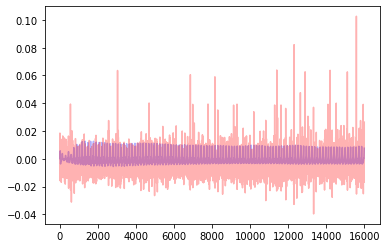

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(d['Brass'][0], 'b', alpha=0.3)
plt.plot(y[0,:], 'r', alpha=0.3)
plt.show()

In [ ]:
import IPython
# original
s = d['Brass'][10]
IPython.display.Audio(s, rate=16000, autoplay=True)

In [ ]:
# synthesized
s = np.reshape( y[10,:], 16000 )
IPython.display.Audio(s, rate=16000, autoplay=True)

In [ ]:
random_input = np.random.rand(1, latent_size)
r = decoder.predict( random_input )
IPython.display.Audio(r[0,:,0], rate=16000, autoplay=True)